# Import Libraries


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from geopy.distance import great_circle
import geopandas as gpd
import mpl_toolkits as mpl
import pyproj as proj
from shapely import geometry
import folium

% matplotlib inline

print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)

Pandas version 0.20.3
Numpy version 1.14.0


## Read in School Data

In [6]:
schools = pd.read_pickle('../data/schools_w_social.pkl')

In [7]:
schools.head()

,School_ID,Short_Name,Long_Name,School_Type,Zip,Facebook,Twitter,Student_Count_Total,Student_Count_Low_Income,School_Hours,Transportation_El,School_Latitude,School_Longitude,Average_ACT_School,Graduation_Rate_School,fb_likes,tw_followers,tw_tweets
10,609764,JUAREZ HS,Benito Juarez Community Academy High School,Neighborhood,60608,NaN,NaN,1739,1659,7:45 AM - 2:35 PM,"Blue, Pink, Red",41.852667,-87.663732,16.5,80.9,NaN,NaN,NaN
11,400054,NOBLE - PRITZKER HS,Noble - Pritzker College Prep,Charter,60639,https://www.facebook.com/benoblepritzker,http://twitter.com/benoblepritzker,992,936,M - R 8:05AM. - 3:50PM F 8:05- 1:30PM,"Blue, Brown",41.915214,-87.730127,21.9,90.3,1793.0,275.0,448.0
12,609726,BROOKS HS,Gwendolyn Brooks College Preparatory Academy HS,Selective enrollment,60628,NaN,https://twitter.com/BrooksPrepCSL,959,692,8:00 AM - 3:30 PM,Orange,41.692763,-87.616353,22.5,93.4,NaN,408.0,3869.0
14,400094,EPIC HS,EPIC Academy Charter High School,Charter,60617,https://www.facebook.com/EPICAcademyHighSchool,https://twitter.com/EPIC_Academy,523,491,8:10 AM-3:50 PM,NaN,41.744849,-87.550222,17.5,69.9,424.0,305.0,787.0
21,609755,YOUNG HS,Whitney M Young Magnet High School,Selective enrollment,60607,http://www.facebook.com/wmymhs,http://www.twitter.com/wyhs,2156,891,8:00 AM - 3:15 PM,Blue,41.878603,-87.664233,27.9,96.2,4004.0,1708.0,999.0


## Convert School Lat/Lons into projected points

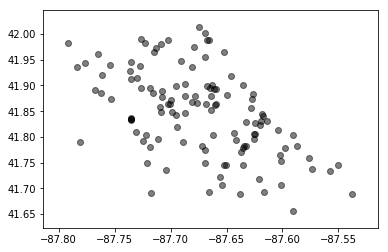

In [44]:
plt.scatter(schools['School_Longitude'], schools['School_Latitude'], alpha=0.5, c='k')

# Import Crime Data

## Read in crime data

In [45]:
crimes = pd.read_pickle('../data/cleaned_crimes.pkl')

In [46]:
crimes.head()

,ID,Date,Primary Type,Arrest,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude
0,10801165,01/01/2017 01:00:00 AM,BATTERY,True,8,1175950.0,1908370.0,41.903933,-87.629129
1,10801166,01/01/2017 01:23:00 AM,PUBLIC PEACE VIOLATION,True,71,1171453.0,1848804.0,41.740579,-87.647394
2,10801090,01/01/2017 12:01:00 AM,CRIMINAL DAMAGE,False,42,1187984.0,1862596.0,41.778047,-87.586388
3,10801213,01/01/2017 01:00:00 AM,BATTERY,False,30,1158068.0,1888177.0,41.848906,-87.695365
4,10801214,01/01/2017 01:45:00 AM,CRIMINAL DAMAGE,True,5,1162249.0,1928318.0,41.958969,-87.678896


In [48]:
X_crime = crimes.loc[:100000, 'Longitude']
Y_crime = crimes.loc[:100000, 'Latitude']

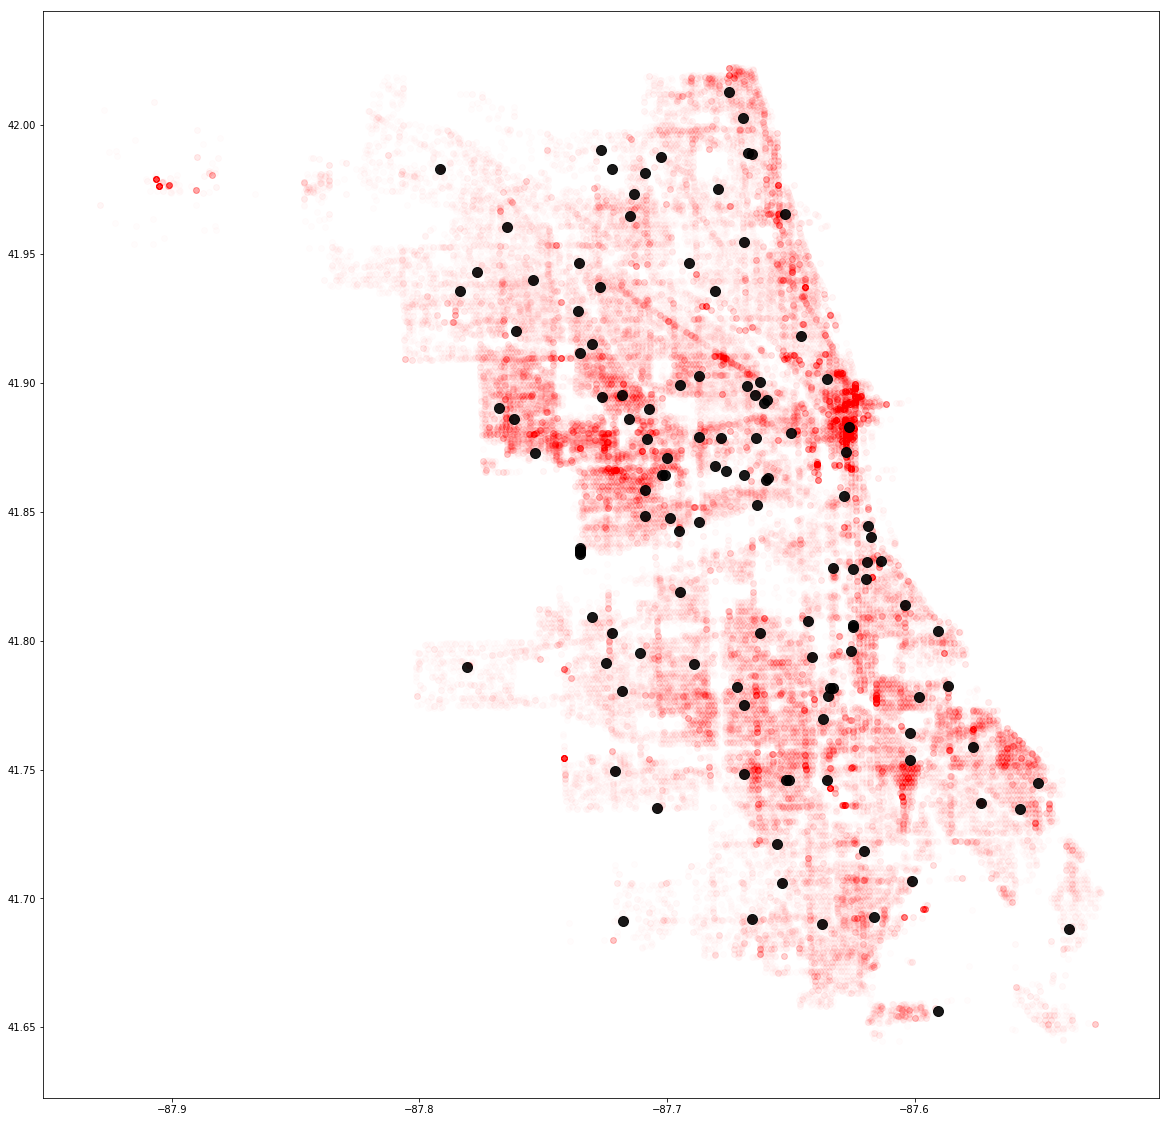

In [87]:
plt.figure(figsize=(20,20))
plt.scatter(X_crime, Y_crime, alpha=0.01, c='r')
plt.scatter(schools['School_Longitude'], schools['School_Latitude'], alpha=0.9, c='k', s=100)

## Find Count of 2017 Crimes in Chicago within a .15 mile radius of the school grounds

In [67]:
def count_nearby_crimes(school_df=schools, crime_df=crimes):
    
    # Find coordinates of school
    lat_lst = list(school_df['School_Latitude'])
    long_lst = list(school_df['School_Longitude'])
    combined = list(zip(lat_lst, long_lst))
    
    bound = list(zip(school_df['Primary Type'], combined))
    
    distance_lst = []
    
    
    

In [84]:

# Find coordinates of school

schl_lats = list(schools['School_Latitude'])
schl_long = list(schools['School_Longitude'])
school_coor = list(zip(schl_lats, schl_long))
school_bound = list(zip(schools['School_ID'], school_coor))

crm_lats = list(crimes['Latitude'])
crm_long = list(crimes['Longitude'])
crime_coor = list(zip(crm_lats, crm_long))
crime_bound = list(zip(crimes['ID'], crime_coor))

nearby_crime_ct = []

for index, school in enumerate(school_bound):

    crime_count = 0

    for index, crime in enumerate(crime_bound):
        distance = great_circle(school[1], crime[1]).miles
        
        if distance < 0.05:
            crime_count += 1
            
    nearby_crime_ct.append([school[0], crime_count])


In [86]:
nearby_crime_ct

[[609764, 51],
 [400054, 129],
 [609726, 57],
 [400094, 144],
 [609755, 81],
 [609756, 75],
 [610518, 201],
 [400077, 152],
 [400056, 434],
 [610394, 345],
 [400058, 364],
 [609692, 79],
 [610529, 143],
 [610340, 53],
 [609744, 3],
 [609738, 143],
 [609746, 103],
 [609712, 132],
 [400010, 118],
 [400033, 96],
 [609691, 125],
 [609704, 220],
 [400106, 134],
 [610245, 170],
 [609724, 69],
 [400064, 95],
 [400055, 125],
 [400105, 178],
 [400104, 48],
 [609698, 76],
 [610524, 57],
 [609728, 120],
 [400066, 103],
 [400086, 71],
 [610557, 48],
 [609705, 83],
 [400051, 92],
 [609694, 63],
 [609739, 64],
 [609761, 107],
 [609754, 242],
 [609748, 142],
 [400057, 23],
 [609722, 228],
 [610547, 123],
 [609713, 105],
 [610385, 30],
 [609720, 48],
 [400034, 21],
 [610381, 90],
 [609676, 92],
 [609733, 98],
 [610383, 2],
 [609740, 130],
 [609759, 135],
 [400085, 34],
 [609715, 117],
 [609734, 51],
 [400036, 244],
 [609741, 80],
 [400052, 80],
 [610543, 45],
 [609783, 68],
 [609730, 94],
 [609716, 80

In [75]:
distance_lst

[[610529, 400055, 0.1077939295524554],
 [400086, 610506, 0.0689620981624903],
 [610385, 610383, 0.12267797046684721],
 [610385, 610384, 0.061303586137139834],
 [610385, 610392, 0.06116657562848144],
 [610381, 610380, 0.06318329025221577],
 [610383, 610392, 0.06151144002692193],
 [609730, 610390, 0.06919715479029431],
 [610384, 610392, 0.1224699871762426],
 [400062, 400061, 0.07157751933970019],
 [610499, 400059, 0.07005141215245113],
 [400102, 400091, 0.07402348708410991]]